In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from datetime import datetime, timedelta

In [28]:
# Load the data
data_path = "../data/OCA-Main_Data.csv"
df = pd.read_csv(data_path)

In [29]:
df

,transaction_id,user_id,total_price,charge,created_at,message_status,channel_type,message_type,receivedTimestamp,user_name,field_of_business,join_date,days_since_join,transaction_success
0,6875bd647ecd7c0012e62af9,user_20,540,True,2025-01-18 10:03:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,656,1
1,68746a8de3434a0019b2dd20,user_20,740,True,2025-01-30 09:59:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,668,1
2,686dcfe5e3434a0019b26884,user_20,520,True,2025-02-26 12:31:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,695,1
3,6865cf52e3434a0019b2173b,user_20,520,True,2025-01-21 11:13:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,659,1
4,686dce1de3434a0019b263c7,user_20,800,True,2025-01-10 13:02:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122744,683d3364f7e73600122944c5,user_11,150,True,2025-03-03 10:00:00,submitted,WhatsApp,service,NaN,PT Travel Nusantara,Hospitality,2024-05-22,285,0
122745,683c772b9eb5180012164eea,user_11,150,True,2025-01-30 10:22:00,submitted,WhatsApp,service,NaN,PT Travel Nusantara,Hospitality,2024-05-22,253,0
122746,68445a309eb518001237a910,user_11,400,True,2025-02-26 20:59:00,submitted,WhatsApp,marketing,NaN,PT Travel Nusantara,Hospitality,2024-05-22,280,0
122747,683e626f1e1cd700127b209f,user_11,400,True,2025-02-15 10:30:00,submitted,WhatsApp,marketing,NaN,PT Travel Nusantara,Hospitality,2024-05-22,269,0


In [30]:
# Check and validate the data
print("Shape of the data:", df.shape)
print("First 5 rows:")
print(df.head())
print("Missing values per column:")
print(df.isnull().sum())
print("Data types:")
print(df.dtypes)

Shape of the data: (122749, 14)
First 5 rows:
             transaction_id  user_id  total_price  charge  \
0  6875bd647ecd7c0012e62af9  user_20          540    True   
1  68746a8de3434a0019b2dd20  user_20          740    True   
2  686dcfe5e3434a0019b26884  user_20          520    True   
3  6865cf52e3434a0019b2173b  user_20          520    True   
4  686dce1de3434a0019b263c7  user_20          800    True   

            created_at message_status channel_type message_type  \
0  2025-01-18 10:03:00       answered         Call        voice   
1  2025-01-30 09:59:00       answered         Call        voice   
2  2025-02-26 12:31:00       answered         Call        voice   
3  2025-01-21 11:13:00       answered         Call        voice   
4  2025-01-10 13:02:00       answered         Call        voice   

  receivedTimestamp      user_name field_of_business   join_date  \
0               NaN  CV Hotel Jaya       Hospitality  2023-04-03   
1               NaN  CV Hotel Jaya       Hospita

In [31]:
#Basic statistics
df.describe()

,total_price,days_since_join,transaction_success
count,122749.000000,122749.000000,122749.000000
mean,224.964114,477.364353,0.642335
std,272.726111,289.875672,0.479315
min,0.000000,13.000000,0.000000
25%,50.000000,307.000000,0.000000
50%,150.000000,355.000000,1.000000
75%,400.000000,885.000000,1.000000
max,10680.000000,976.000000,1.000000


In [32]:
df

,transaction_id,user_id,total_price,charge,created_at,message_status,channel_type,message_type,receivedTimestamp,user_name,field_of_business,join_date,days_since_join,transaction_success
0,6875bd647ecd7c0012e62af9,user_20,540,True,2025-01-18 10:03:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,656,1
1,68746a8de3434a0019b2dd20,user_20,740,True,2025-01-30 09:59:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,668,1
2,686dcfe5e3434a0019b26884,user_20,520,True,2025-02-26 12:31:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,695,1
3,6865cf52e3434a0019b2173b,user_20,520,True,2025-01-21 11:13:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,659,1
4,686dce1de3434a0019b263c7,user_20,800,True,2025-01-10 13:02:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122744,683d3364f7e73600122944c5,user_11,150,True,2025-03-03 10:00:00,submitted,WhatsApp,service,NaN,PT Travel Nusantara,Hospitality,2024-05-22,285,0
122745,683c772b9eb5180012164eea,user_11,150,True,2025-01-30 10:22:00,submitted,WhatsApp,service,NaN,PT Travel Nusantara,Hospitality,2024-05-22,253,0
122746,68445a309eb518001237a910,user_11,400,True,2025-02-26 20:59:00,submitted,WhatsApp,marketing,NaN,PT Travel Nusantara,Hospitality,2024-05-22,280,0
122747,683e626f1e1cd700127b209f,user_11,400,True,2025-02-15 10:30:00,submitted,WhatsApp,marketing,NaN,PT Travel Nusantara,Hospitality,2024-05-22,269,0


In [33]:
df_cleaned=df.copy

In [34]:
df_cleaned

<bound method NDFrame.copy of                   transaction_id  user_id  total_price  charge  \
0       6875bd647ecd7c0012e62af9  user_20          540    True   
1       68746a8de3434a0019b2dd20  user_20          740    True   
2       686dcfe5e3434a0019b26884  user_20          520    True   
3       6865cf52e3434a0019b2173b  user_20          520    True   
4       686dce1de3434a0019b263c7  user_20          800    True   
...                          ...      ...          ...     ...   
122744  683d3364f7e73600122944c5  user_11          150    True   
122745  683c772b9eb5180012164eea  user_11          150    True   
122746  68445a309eb518001237a910  user_11          400    True   
122747  683e626f1e1cd700127b209f  user_11          400    True   
122748  684476d7848ce100123a0cf9  user_11          400    True   

                 created_at message_status channel_type message_type  \
0       2025-01-18 10:03:00       answered         Call        voice   
1       2025-01-30 09:59:00      

Processing Frequency Metrics 

In [35]:
class FMClustering:
    def __init__(self, df):
        self.df = df
        self.df_cleaned = df.copy()
        self.scaler = StandardScaler()
        self.fm_data = None
        self.optimal_k = None
        self.clustered_data = None
        self.extended_features = None

    def preprocess_data(self):
        """Preprocess data and create FM metrics (Frequency and Monetary only)"""
        try:
            # Handle datetime conversion for descriptive analysis
            if "created_at" in self.df_cleaned.columns:
                self.df_cleaned["created_at"] = pd.to_datetime(
                    self.df_cleaned["created_at"], errors="coerce"
                )
                self.df["created_at"] = pd.to_datetime(
                    self.df["created_at"], errors="coerce"
                )

                # Remove invalid dates
                if self.df_cleaned["created_at"].isna().any():
                    print(
                        f"Warning: {self.df_cleaned['created_at'].isna().sum()} rows with invalid dates removed"
                    )
                    self.df_cleaned = self.df_cleaned.dropna(subset=["created_at"])
                    self.df = self.df.dropna(subset=["created_at"])

            # Check required columns
            required_columns = ["user_id", "transaction_id", "total_price"]
            missing_columns = [
                col for col in required_columns if col not in self.df_cleaned.columns
            ]
            if missing_columns:
                raise ValueError(f"Missing required columns: {missing_columns}")

            # Calculate reference date for recency (descriptive only - not used in clustering)
            reference_date = self.df_cleaned["created_at"].max()
            print(f"Reference date for recency calculation: {reference_date}")

            # Create FM metrics + Recency for descriptive analysis
            fm_metrics = (
                self.df_cleaned.groupby("user_id")
                .agg({
                    "transaction_id": "count",  # Frequency (PRIMARY CLUSTERING FEATURE)
                    "total_price": "sum",  # Monetary (PRIMARY CLUSTERING FEATURE)
                    "created_at": "max",  # Last transaction date for Recency (descriptive only)
                    "user_name": "first",
                    "channel_type": "first",
                    "message_status": "first",
                    "field_of_business": "first",
                })
                .reset_index()
            )

            fm_metrics.columns = [
                "user_id",
                "frequency",
                "monetary",
                "last_transaction_date",
                "user_name",
                "channel_type",
                "message_status",
                "field_of_business",
            ]

            # Calculate recency (for descriptive analysis only)
            fm_metrics["recency"] = (
                reference_date - fm_metrics["last_transaction_date"]
            ).dt.days

            # Calculate additional metrics
            fm_metrics["avg_transaction_value"] = (
                fm_metrics["monetary"] / fm_metrics["frequency"]
            )

            # IMPORTANT: Only Frequency and Monetary will be used for clustering
            self.extended_features = fm_metrics[
                ["frequency", "monetary"]  # ONLY FM for clustering
            ].copy()

            self.fm_data = fm_metrics

            print("FM Data created successfully!")
            print(f"Number of unique users: {len(fm_metrics)}")
            print("\nCLUSTERING FEATURES (Frequency & Monetary only):")
            print(fm_metrics[["frequency", "monetary"]].describe())
            print("\nDESCRIPTIVE FEATURES (including Recency):")
            print(
                fm_metrics[
                    ["recency", "frequency", "monetary", "avg_transaction_value"]
                ].describe()
            )

            return True

        except Exception as e:
            print(f"Error in preprocessing: {e}")
            return False

    def find_optimal_clusters(self, max_k=10):
        """Find optimal number of clusters using elbow method and silhouette analysis"""
        if self.fm_data is None:
            print("Error: FM data not found. Please run preprocess_data() first.")
            return None, None, None

        # Use ONLY Frequency and Monetary for clustering
        X = self.fm_data[["frequency", "monetary"]].copy()
        print(f"\nClustering based on: {list(X.columns)}")

        if X.isnull().any().any():
            print("Warning: Missing values found. Removing rows with missing values.")
            X = X.dropna()

        if X.empty:
            print("Error: No valid data remaining after cleaning.")
            return None, None, None

        X_scaled = self.scaler.fit_transform(X)
        k_range = range(2, min(max_k + 1, len(X)))
        inertias = []
        silhouette_scores = []

        print(f"Testing k values from {min(k_range)} to {max(k_range)}")

        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_scaled)
            inertias.append(kmeans.inertia_)

            score = silhouette_score(X_scaled, kmeans.labels_)
            silhouette_scores.append(score)
            print(f"k={k}: Silhouette Score = {score:.3f}")

        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Elbow method
        ax1.plot(k_range, inertias, "bo-", markersize=8, linewidth=2)
        ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
        ax1.set_ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)
        ax1.set_title(
            "Elbow Method for Optimal k\n(Based on Frequency & Monetary)",
            fontsize=14,
            fontweight="bold",
        )
        ax1.grid(True, alpha=0.3)

        # Silhouette analysis
        ax2.plot(k_range, silhouette_scores, "ro-", markersize=8, linewidth=2)
        ax2.set_xlabel("Number of Clusters (k)", fontsize=12)
        ax2.set_ylabel("Silhouette Score", fontsize=12)
        ax2.set_title(
            "Silhouette Analysis\n(Based on Frequency & Monetary)",
            fontsize=14,
            fontweight="bold",
        )
        ax2.grid(True, alpha=0.3)

        # Find optimal k
        optimal_k = k_range[np.argmax(silhouette_scores)]
        self.optimal_k = optimal_k

        ax2.axvline(x=optimal_k, color="red", linestyle="--", alpha=0.7, linewidth=2)
        ax2.text(
            optimal_k + 0.1,
            max(silhouette_scores) * 0.9,
            f"Optimal k = {optimal_k}",
            fontsize=11,
            fontweight="bold",
        )

        plt.tight_layout()
        plt.show()

        print(f"\nOptimal number of clusters: {optimal_k}")
        print(f"Silhouette score for optimal k: {max(silhouette_scores):.3f}")

        return optimal_k, inertias, silhouette_scores

    def perform_clustering(self, n_clusters=3):
        """Perform FM clustering and create 3 distinct segments based on cluster characteristics"""
        if self.fm_data is None:
            print("Error: FM data not found. Please run preprocess_data() first.")
            return None

        # Use n_clusters or default to 3
        if n_clusters is None:
            n_clusters = self.optimal_k if self.optimal_k else 3

        print(f"\nPerforming FM clustering with k={n_clusters}")
        print(
            "Clustering features: Frequency (transaction_id count) and Monetary (total_price sum)"
        )

        # Use ONLY Frequency and Monetary for clustering
        X = self.fm_data[["frequency", "monetary"]].copy()

        # Handle missing values
        if X.isnull().any().any():
            valid_indices = X.dropna().index
            X = X.loc[valid_indices]
        else:
            valid_indices = X.index

        X_scaled = self.scaler.fit_transform(X)

        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_scaled)

        # Initialize cluster column
        self.fm_data["cluster"] = -1
        self.fm_data.loc[valid_indices, "cluster"] = clusters

        # Create segment names based on cluster characteristics (avoid overlapping names)
        valid_data = self.fm_data[self.fm_data["cluster"] != -1]
        cluster_summary = valid_data.groupby("cluster")[
            ["frequency", "monetary"]
        ].mean()

        print(f"\nCluster centers (after scaling back):")
        print(cluster_summary.round(2))

        # Sort clusters by total value (frequency + monetary combined score) to assign names consistently
        cluster_summary["combined_score"] = (
            cluster_summary["frequency"] / cluster_summary["frequency"].max()
            + cluster_summary["monetary"] / cluster_summary["monetary"].max()
        )
        cluster_ranking = cluster_summary.sort_values("combined_score", ascending=False)

        print(f"\nCluster ranking by combined F+M score:")
        print(cluster_ranking[["frequency", "monetary", "combined_score"]].round(2))

        # Assign distinct segment names based on ranking and characteristics
        segment_names = {}
        ranked_clusters = cluster_ranking.index.tolist()

        if n_clusters == 3:
            # For 3 clusters, assign based on ranking
            segment_names[ranked_clusters[0]] = (
                "Cluster_1_High_Value"  # Highest combined F+M
            )
            segment_names[ranked_clusters[1]] = (
                "Cluster_2_Medium_Value"  # Medium combined F+M
            )
            segment_names[ranked_clusters[2]] = (
                "Cluster_3_Low_Value"  # Lowest combined F+M
            )
        else:
            # For other numbers of clusters, use generic naming
            for i, cluster_id in enumerate(ranked_clusters):
                segment_names[cluster_id] = f"Cluster_{i + 1}"

        # Handle incomplete data
        segment_names[-1] = "Incomplete_Data"

        self.fm_data["segment_name"] = self.fm_data["cluster"].map(segment_names)
        self.clustered_data = self.fm_data.copy()

        print(f"\nFM Clustering completed successfully!")
        print(f"Number of clusters: {n_clusters}")

        print(f"\nCluster Characteristics:")
        for cluster_id in ranked_clusters:
            freq = cluster_summary.loc[cluster_id, "frequency"]
            monetary = cluster_summary.loc[cluster_id, "monetary"]
            segment_name = segment_names[cluster_id]
            customer_count = len(valid_data[valid_data["cluster"] == cluster_id])

            print(f"• {segment_name}:")
            print(f"  - Average Frequency: {freq:.1f} transactions")
            print(f"  - Average Monetary: ${monetary:,.0f}")
            print(f"  - Customer Count: {customer_count}")
            print(
                f"  - Combined Score: {cluster_ranking.loc[cluster_id, 'combined_score']:.2f}"
            )

        print(f"\nSegment Distribution:")
        segment_counts = self.fm_data["segment_name"].value_counts()
        print(segment_counts)

        return clusters

    def validate_segmentation(self):
        """Validate FM segmentation using boxplots to check for overlapping"""
        if self.clustered_data is None:
            print(
                "Error: No clustered data available. Please run perform_clustering() first."
            )
            return

        valid_data = self.clustered_data[self.clustered_data["cluster"] != -1]

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Frequency boxplot by segment (PRIMARY CLUSTERING FEATURE)
        valid_data.boxplot(column="frequency", by="segment_name", ax=axes[0, 0])
        axes[0, 0].set_title(
            "Frequency Distribution by Segment\n(PRIMARY CLUSTERING FEATURE)",
            fontweight="bold",
        )
        axes[0, 0].set_xlabel("Segment")
        axes[0, 0].set_ylabel("Frequency (Transaction Count)")

        # Monetary boxplot by segment (PRIMARY CLUSTERING FEATURE)
        valid_data.boxplot(column="monetary", by="segment_name", ax=axes[0, 1])
        axes[0, 1].set_title(
            "Monetary Distribution by Segment\n(PRIMARY CLUSTERING FEATURE)",
            fontweight="bold",
        )
        axes[0, 1].set_xlabel("Segment")
        axes[0, 1].set_ylabel("Monetary (Total Revenue)")

        # Recency boxplot by segment (DESCRIPTIVE ONLY)
        valid_data.boxplot(column="recency", by="segment_name", ax=axes[1, 0])
        axes[1, 0].set_title(
            "Recency Distribution by Segment\n(DESCRIPTIVE ONLY)", fontweight="bold"
        )
        axes[1, 0].set_xlabel("Segment")
        axes[1, 0].set_ylabel("Recency (Days)")

        # Average transaction value boxplot by segment (DESCRIPTIVE)
        valid_data.boxplot(
            column="avg_transaction_value", by="segment_name", ax=axes[1, 1]
        )
        axes[1, 1].set_title(
            "Avg Transaction Value by Segment\n(DESCRIPTIVE)", fontweight="bold"
        )
        axes[1, 1].set_xlabel("Segment")
        axes[1, 1].set_ylabel("Avg Transaction Value")

        plt.suptitle(
            "FM Segmentation Validation - Distribution Analysis",
            fontsize=16,
            fontweight="bold",
        )
        plt.tight_layout()
        plt.show()

        # Print statistical validation
        print("\nFM Segmentation Validation Statistics:")
        print("=" * 60)
        print("PRIMARY CLUSTERING FEATURES (Frequency & Monetary):")
        print("-" * 40)

        for segment in valid_data["segment_name"].unique():
            if pd.isna(segment):
                continue
            segment_data = valid_data[valid_data["segment_name"] == segment]
            print(f"\n{segment} (n={len(segment_data)}):")
            print(
                f"  🎯 Frequency - Mean: {segment_data['frequency'].mean():.1f}, Std: {segment_data['frequency'].std():.1f}"
            )
            print(
                f"  🎯 Monetary - Mean: ${segment_data['monetary'].mean():.0f}, Std: ${segment_data['monetary'].std():.0f}"
            )
            print(
                f"  📊 Recency - Mean: {segment_data['recency'].mean():.1f} days, Std: {segment_data['recency'].std():.1f}"
            )
            print(
                f"  📊 Avg Transaction Value: ${segment_data['avg_transaction_value'].mean():.0f}"
            )

    def create_fm_quadrant_visualization(self):
        """Create FM quadrant visualization (Frequency vs Monetary)"""
        if self.clustered_data is None:
            print("Error: No clustered data available.")
            return

        valid_data = self.clustered_data[self.clustered_data["cluster"] != -1]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

        # FM Scatter plot with segments
        colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FECA57"]
        markers = ["o", "s", "^", "D", "v"]

        for i, segment in enumerate(valid_data["segment_name"].unique()):
            if pd.isna(segment):
                continue
            segment_data = valid_data[valid_data["segment_name"] == segment]
            ax1.scatter(
                segment_data["frequency"],
                segment_data["monetary"],
                c=colors[i % len(colors)],
                label=segment,
                alpha=0.7,
                s=100,
                marker=markers[i % len(markers)],
                edgecolors="black",
                linewidth=0.5,
            )

        # Add median lines to show FM quadrants
        freq_median = valid_data["frequency"].median()
        monetary_median = valid_data["monetary"].median()

        ax1.axvline(
            x=freq_median, color="black", linestyle="--", alpha=0.7, linewidth=2
        )
        ax1.axhline(
            y=monetary_median, color="black", linestyle="--", alpha=0.7, linewidth=2
        )

        ax1.set_xlabel(
            "Frequency (Number of Transactions)", fontsize=12, fontweight="bold"
        )
        ax1.set_ylabel("Monetary (Total Revenue)", fontsize=12, fontweight="bold")
        ax1.set_title(
            "FM Segmentation - Frequency vs Monetary Quadrant\n(Clustering based on these 2 features only)",
            fontsize=14,
            fontweight="bold",
        )
        ax1.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
        ax1.grid(True, alpha=0.3)

        # Add quadrant labels with enhanced styling
        bbox_props = dict(
            boxstyle="round,pad=0.4", facecolor="white", alpha=0.8, edgecolor="black"
        )

        # Get quadrant positions for labels
        x_high = ax1.get_xlim()[1] * 0.75
        x_low = ax1.get_xlim()[1] * 0.25
        y_high = ax1.get_ylim()[1] * 0.85
        y_low = ax1.get_ylim()[1] * 0.15

        ax1.text(
            x_high,
            y_high,
            "CHAMPIONS\n(High F, High M)",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.4", facecolor="#FFD93D", alpha=0.8),
        )
        ax1.text(
            x_low,
            y_high,
            "BIG SPENDERS\n(Low F, High M)",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.4", facecolor="#6BCF7F", alpha=0.8),
        )
        ax1.text(
            x_high,
            y_low,
            "LOYAL CUSTOMERS\n(High F, Low M)",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.4", facecolor="#4D96FF", alpha=0.8),
        )
        ax1.text(
            x_low,
            y_low,
            "POTENTIAL LOYALISTS\n(Low F, Low M)",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.4", facecolor="#FF9F40", alpha=0.8),
        )

        # Segment size pie chart
        segment_counts = valid_data["segment_name"].value_counts()
        wedges, texts, autotexts = ax2.pie(
            segment_counts.values,
            labels=segment_counts.index,
            autopct="%1.1f%%",
            colors=colors[: len(segment_counts)],
            startangle=90,
            textprops={"fontsize": 10},
        )

        # Enhance pie chart
        for autotext in autotexts:
            autotext.set_color("white")
            autotext.set_fontweight("bold")

        ax2.set_title(
            "Segment Distribution\n(Based on FM Clustering)",
            fontsize=14,
            fontweight="bold",
        )

        plt.tight_layout()
        plt.show()

        # Print quadrant summary
        print("\n🎯 FM QUADRANT SUMMARY:")
        print("=" * 50)
        freq_med = valid_data["frequency"].median()
        monetary_med = valid_data["monetary"].median()
        print(f"Frequency median threshold: {freq_med}")
        print(f"Monetary median threshold: ${monetary_med:,.0f}")

        for segment in segment_counts.index:
            segment_data = valid_data[valid_data["segment_name"] == segment]
            avg_freq = segment_data["frequency"].mean()
            avg_monetary = segment_data["monetary"].mean()
            count = len(segment_data)
            percentage = (count / len(valid_data)) * 100

            print(f"\n📊 {segment}:")
            print(f"   Count: {count} customers ({percentage:.1f}%)")
            print(f"   Avg Frequency: {avg_freq:.1f} transactions")
            print(f"   Avg Monetary: ${avg_monetary:,.0f}")
            print(
                f"   Quadrant: {'High' if avg_freq > freq_med else 'Low'} F + {'High' if avg_monetary > monetary_med else 'Low'} M"
            )

    def analyze_channel_distribution(self):
        """Analyze channel distribution by FM segment"""
        if (
            self.clustered_data is None
            or "channel_type" not in self.clustered_data.columns
        ):
            print("Error: No channel data available for analysis.")
            return None

        valid_data = self.clustered_data[self.clustered_data["cluster"] != -1]

        # Channel distribution analysis
        channel_analysis = (
            pd.crosstab(
                valid_data["segment_name"],
                valid_data["channel_type"],
                normalize="index",
            )
            * 100
        )

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Channel distribution heatmap
        sns.heatmap(channel_analysis, annot=True, fmt=".1f", cmap="Blues", ax=ax1)
        ax1.set_title(
            "Channel Distribution by FM Segment (%)", fontsize=14, fontweight="bold"
        )
        ax1.set_xlabel("Channel Type")
        ax1.set_ylabel("FM Segment")

        # Channel preference by segment (stacked bar)
        channel_counts = pd.crosstab(
            valid_data["segment_name"], valid_data["channel_type"]
        )
        channel_counts.plot(
            kind="bar",
            stacked=True,
            ax=ax2,
            color=["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4"],
        )
        ax2.set_title(
            "Channel Usage Count by FM Segment", fontsize=14, fontweight="bold"
        )
        ax2.set_xlabel("FM Segment")
        ax2.set_ylabel("Count")
        ax2.legend(title="Channel Type")
        ax2.tick_params(axis="x", rotation=45)

        plt.tight_layout()
        plt.show()

        print("📊 CHANNEL DISTRIBUTION ANALYSIS BY FM SEGMENT:")
        print("=" * 50)
        print(channel_analysis.round(1))

        return channel_analysis

    def analyze_time_distribution(self):
        """Analyze time distribution patterns by FM segment"""
        if self.clustered_data is None:
            print("Error: No clustered data available.")
            return None

        # Merge with original transaction data
        df_with_segments = self.df.merge(
            self.clustered_data[["user_id", "segment_name"]], on="user_id", how="left"
        )

        # Extract time features
        df_with_segments["hour"] = df_with_segments["created_at"].dt.hour
        df_with_segments["day_of_week"] = df_with_segments["created_at"].dt.day_name()
        df_with_segments["month"] = df_with_segments["created_at"].dt.month

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Hour distribution
        hour_dist = (
            df_with_segments.groupby(["segment_name", "hour"])
            .size()
            .unstack(fill_value=0)
        )
        hour_dist.T.plot(kind="line", ax=axes[0, 0], marker="o", linewidth=2)
        axes[0, 0].set_title(
            "Transaction Distribution by Hour\n(FM Segments)", fontweight="bold"
        )
        axes[0, 0].set_xlabel("Hour of Day")
        axes[0, 0].set_ylabel("Number of Transactions")
        axes[0, 0].legend(title="FM Segment")
        axes[0, 0].grid(True, alpha=0.3)

        # Day of week distribution
        day_order = [
            "Monday",
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday",
        ]
        day_dist = (
            df_with_segments.groupby(["segment_name", "day_of_week"])
            .size()
            .unstack(fill_value=0)
        )
        day_dist = day_dist.reindex(columns=day_order)
        day_dist.T.plot(kind="bar", ax=axes[0, 1])
        axes[0, 1].set_title(
            "Transaction Distribution by Day of Week\n(FM Segments)", fontweight="bold"
        )
        axes[0, 1].set_xlabel("Day of Week")
        axes[0, 1].set_ylabel("Number of Transactions")
        axes[0, 1].legend(title="FM Segment")
        axes[0, 1].tick_params(axis="x", rotation=45)

        # Monthly distribution
        month_dist = (
            df_with_segments.groupby(["segment_name", "month"])
            .size()
            .unstack(fill_value=0)
        )
        month_dist.T.plot(kind="line", ax=axes[1, 0], marker="o", linewidth=2)
        axes[1, 0].set_title(
            "Transaction Distribution by Month\n(FM Segments)", fontweight="bold"
        )
        axes[1, 0].set_xlabel("Month")
        axes[1, 0].set_ylabel("Number of Transactions")
        axes[1, 0].legend(title="FM Segment")
        axes[1, 0].grid(True, alpha=0.3)

        # Revenue by time (monthly)
        revenue_dist = (
            df_with_segments.groupby(["segment_name", "month"])["total_price"]
            .sum()
            .unstack(fill_value=0)
        )
        revenue_dist.T.plot(kind="line", ax=axes[1, 1], marker="o", linewidth=2)
        axes[1, 1].set_title(
            "Revenue Distribution by Month\n(FM Segments)", fontweight="bold"
        )
        axes[1, 1].set_xlabel("Month")
        axes[1, 1].set_ylabel("Total Revenue")
        axes[1, 1].legend(title="FM Segment")
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return df_with_segments

    def generate_strategic_recommendations(self):
        """Generate actionable strategic recommendations based on FM segmentation"""
        if self.clustered_data is None:
            print("Error: No clustered data available.")
            return None

        valid_data = self.clustered_data[self.clustered_data["cluster"] != -1]
        total_revenue = valid_data["monetary"].sum()

        print("\n" + "=" * 80)
        print("STRATEGIC RECOMMENDATIONS & IMPACT ANALYSIS")
        print("(Based on Frequency-Monetary Clustering)")
        print("=" * 80)

        segment_analysis = (
            valid_data.groupby("segment_name")
            .agg({
                "user_id": "count",
                "monetary": ["sum", "mean"],
                "frequency": "mean",
                "recency": "mean",
                "avg_transaction_value": "mean",
            })
            .round(2)
        )

        segment_analysis.columns = [
            "customer_count",
            "total_revenue",
            "avg_revenue_per_customer",
            "avg_frequency",
            "avg_recency",
            "avg_transaction_value",
        ]
        segment_analysis["revenue_percentage"] = (
            segment_analysis["total_revenue"] / total_revenue * 100
        ).round(1)

        print(f"\n📊 FM SEGMENT PERFORMANCE OVERVIEW:")
        print("-" * 60)
        print(segment_analysis)

        print(f"\n🎯 STRATEGIC RECOMMENDATIONS BY FM SEGMENT:")
        print("-" * 60)

        for segment in segment_analysis.index:
            segment_data = segment_analysis.loc[segment]
            print(f"\n🔸 {segment.upper()}")

            if "Champions" in segment:
                print("   📈 FM Profile: High Frequency + High Monetary")
                print("   🎯 Strategy: RETAIN & REWARD")
                print("   📋 Actions:")
                print("   • VIP treatment and exclusive offers")
                print("   • Loyalty program with premium benefits")
                print("   • Personal account management")
                print("   • Early access to new products")
                retention_impact = segment_data["avg_revenue_per_customer"] * 0.15
                print(
                    f"   💰 Retention impact: +15% retention = +${retention_impact:,.0f} per customer"
                )

            elif "VIP Champions" in segment:
                print("   📈 FM Profile: Very High Frequency + Very High Monetary")
                print("   🎯 Strategy: ULTRA-PREMIUM RETENTION")
                print("   📋 Actions:")
                print("   • Concierge-level service")
                print("   • Exclusive events and experiences")
                print("   • Personal relationship manager")
                print("   • Custom product development")
                retention_impact = segment_data["avg_revenue_per_customer"] * 0.20
                print(
                    f"   💰 Retention impact: +20% retention = +${retention_impact:,.0f} per customer"
                )

            elif "Rising Champions" in segment:
                print("   📈 FM Profile: High Frequency + High Monetary (Developing)")
                print("   🎯 Strategy: ACCELERATE TO CHAMPION STATUS")
                print("   📋 Actions:")
                print("   • Graduated loyalty benefits")
                print("   • Performance-based rewards")
                print("   • Engagement amplification programs")
                print("   • Champion pathway incentives")
                growth_impact = segment_data["avg_revenue_per_customer"] * 0.25
                print(
                    f"   💰 Growth impact: +25% acceleration = +${growth_impact:,.0f} per customer"
                )

            elif "Big Spenders" in segment:
                print("   📈 FM Profile: Low Frequency + High Monetary")
                print("   🎯 Strategy: INCREASE TRANSACTION FREQUENCY")
                print("   📋 Actions:")
                print("   • Targeted frequency-boosting campaigns")
                print("   • Subscription or membership programs")
                print("   • Regular engagement and reminders")
                print("   • Convenience improvements")
                frequency_boost = segment_data["avg_revenue_per_customer"] * 0.6
                print(
                    f"   💰 Frequency impact: +60% frequency = +${frequency_boost:,.0f} per customer"
                )

            elif "High Value Customers" in segment:
                print("   📈 FM Profile: Low-Mid Frequency + High Monetary")
                print("   🎯 Strategy: BALANCED GROWTH (FREQUENCY + RETENTION)")
                print("   📋 Actions:")
                print("   • Hybrid engagement programs")
                print("   • Value-based communications")
                print("   • Frequency incentives with retention focus")
                print("   • Premium service tier")
                balanced_impact = segment_data["avg_revenue_per_customer"] * 0.4
                print(
                    f"   💰 Balanced impact: +40% improvement = +${balanced_impact:,.0f} per customer"
                )

            elif "Loyal Customers" in segment:
                print("   📈 FM Profile: High Frequency + Low Monetary")
                print("   🎯 Strategy: INCREASE SPEND PER TRANSACTION")
                print("   📋 Actions:")
                print("   • Cross-sell and upsell campaigns")
                print("   • Bundle offers and volume discounts")
                print("   • Premium product recommendations")
                print("   • Value-added services")
                spend_increase = segment_data["avg_transaction_value"] * 0.4
                total_impact = spend_increase * segment_data["avg_frequency"]
                print(
                    f"   💰 Spend impact: +40% transaction value = +${total_impact:,.0f} per customer"
                )

            elif "Frequent Buyers" in segment:
                print("   📈 FM Profile: High Frequency + Low-Mid Monetary")
                print("   🎯 Strategy: OPTIMIZE PURCHASE VALUE")
                print("   📋 Actions:")
                print("   • Smart upselling at point of purchase")
                print("   • Category expansion campaigns")
                print("   • Value-pack promotions")
                print("   • Loyalty points for higher-value items")
                value_impact = segment_data["avg_revenue_per_customer"] * 0.3
                print(
                    f"   💰 Value impact: +30% purchase optimization = +${value_impact:,.0f} per customer"
                )

            elif "Potential Loyalists" in segment:
                print("   📈 FM Profile: Low Frequency + Low Monetary")
                print("   🎯 Strategy: ACTIVATE & NURTURE")
                print("   📋 Actions:")
                print("   • Onboarding improvement programs")
                print("   • Educational content and tutorials")
                print("   • Incentive programs for trial purchases")
                print("   • Regular check-ins and personalized offers")
                # Calculate upgrade potential
                champion_avg = segment_analysis.loc[
                    segment_analysis.index.str.contains("Champions", na=False),
                    "avg_revenue_per_customer",
                ]
                if len(champion_avg) > 0:
                    upgrade_impact = (
                        champion_avg.iloc[0] - segment_data["avg_revenue_per_customer"]
                    )
                else:
                    upgrade_impact = segment_data["avg_revenue_per_customer"] * 1.5
                print(
                    f"   💰 Upgrade impact: 25% conversion rate = +${upgrade_impact * 0.25:,.0f} per customer"
                )

            elif "New Customers" in segment:
                print("   📈 FM Profile: Very Low Frequency + Very Low Monetary")
                print("   🎯 Strategy: FOUNDATION BUILDING")
                print("   📋 Actions:")
                print("   • Welcome series and onboarding")
                print("   • First-purchase incentives")
                print("   • Product discovery programs")
                print("   • Barrier-reduction initiatives")
                foundation_impact = segment_data["avg_revenue_per_customer"] * 0.8
                print(
                    f"   💰 Foundation impact: +80% early development = +${foundation_impact:,.0f} per customer"
                )

        print(f"\n💰 REVENUE OPTIMIZATION PROJECTIONS (FM-based):")
        print("-" * 60)

        # Calculate potential revenue increases based on FM characteristics
        total_potential_increase = 0

        for segment in segment_analysis.index:
            segment_data = segment_analysis.loc[segment]
            customer_count = segment_data["customer_count"]

            if "Champions" in segment:
                # Focus on retention (95% vs 80% retention)
                retention_impact = (
                    customer_count * 0.15 * segment_data["avg_revenue_per_customer"]
                )
                total_potential_increase += retention_impact
                print(f"• {segment}: Retention improvement = +${retention_impact:,.0f}")

            elif "Big Spenders" in segment:
                # Focus on frequency (boost by 60%)
                frequency_impact = (
                    customer_count * segment_data["avg_revenue_per_customer"] * 0.6
                )
                total_potential_increase += frequency_impact
                print(f"• {segment}: Frequency increase = +${frequency_impact:,.0f}")

            elif "Loyal Customers" in segment:
                # Focus on monetary per transaction (boost by 40%)
                spend_impact = (
                    customer_count * segment_data["avg_revenue_per_customer"] * 0.4
                )
                total_potential_increase += spend_impact
                print(f"• {segment}: Spend per transaction = +${spend_impact:,.0f}")

            elif "Potential Loyalists" in segment:
                # Focus on conversion (25% upgrade rate)
                conversion_rate = 0.25
                convertible_customers = customer_count * conversion_rate
                avg_upgrade_value = segment_data["avg_revenue_per_customer"] * 1.5
                conversion_impact = convertible_customers * avg_upgrade_value
                total_potential_increase += conversion_impact
                print(
                    f"• {segment}: Conversion improvement = +${conversion_impact:,.0f}"
                )

        print(
            f"\n💡 TOTAL POTENTIAL REVENUE INCREASE: ${total_potential_increase:,.0f}"
        )
        print(f"   Current Total Revenue: ${total_revenue:,.0f}")
        print(
            f"   Projected Total Revenue: ${total_revenue + total_potential_increase:,.0f}"
        )
        print(
            f"   Growth Percentage: {(total_potential_increase / total_revenue) * 100:.1f}%"
        )

        print(f"\n🔍 FM CLUSTERING INSIGHTS:")
        print("-" * 40)
        print("✅ Segmentation based purely on Frequency & Monetary values")
        print("✅ Each segment has distinct F-M characteristics")
        print("✅ Strategies targeted to specific FM quadrant behaviors")
        print("✅ Recency used only for descriptive analysis")

        return segment_analysis

    def generate_cluster_recommendations(self):
        """Generate strategic recommendations based on cluster characteristics (without predefined names)"""
        if self.clustered_data is None:
            print("Error: No clustered data available.")
            return None

        valid_data = self.clustered_data[self.clustered_data["cluster"] != -1]
        total_revenue = valid_data["monetary"].sum()

        print("\n" + "=" * 80)
        print("STRATEGIC RECOMMENDATIONS & IMPACT ANALYSIS")
        print("(Based on Frequency-Monetary Clustering Characteristics)")
        print("=" * 80)

        segment_analysis = (
            valid_data.groupby("segment_name")
            .agg({
                "user_id": "count",
                "monetary": ["sum", "mean"],
                "frequency": "mean",
                "recency": "mean",
                "avg_transaction_value": "mean",
            })
            .round(2)
        )

        segment_analysis.columns = [
            "customer_count",
            "total_revenue",
            "avg_revenue_per_customer",
            "avg_frequency",
            "avg_recency",
            "avg_transaction_value",
        ]
        segment_analysis["revenue_percentage"] = (
            segment_analysis["total_revenue"] / total_revenue * 100
        ).round(1)

        print(f"\n📊 CLUSTER PERFORMANCE OVERVIEW:")
        print("-" * 60)
        print(segment_analysis)

        # Calculate overall medians for comparison
        freq_median = valid_data["frequency"].median()
        monetary_median = valid_data["monetary"].median()

        print(f"\n🎯 STRATEGIC RECOMMENDATIONS BY CLUSTER:")
        print("-" * 60)
        print(
            f"Dataset Medians - Frequency: {freq_median}, Monetary: ${monetary_median:,.0f}"
        )

        for segment in segment_analysis.index:
            if "Incomplete" in segment:
                continue

            segment_data = segment_analysis.loc[segment]
            avg_freq = segment_data["avg_frequency"]
            avg_monetary = segment_data["avg_revenue_per_customer"]

            # Determine cluster characteristics relative to medians
            freq_level = "High" if avg_freq > freq_median else "Low"
            monetary_level = "High" if avg_monetary > monetary_median else "Low"

            print(f"\n🔸 {segment.upper()}")
            print(
                f"   📈 Cluster Profile: {freq_level} Frequency ({avg_freq:.1f}) + {monetary_level} Monetary (${avg_monetary:,.0f})"
            )
            print(
                f"   👥 Customer Count: {int(segment_data['customer_count'])} ({segment_data['revenue_percentage']:.1f}% of revenue)"
            )

            # Strategy based on FM characteristics
            if freq_level == "High" and monetary_level == "High":
                print("   🎯 Strategy: RETAIN & MAXIMIZE (Best Customers)")
                print("   📋 Actions:")
                print("   • VIP treatment and exclusive offers")
                print("   • Loyalty program with premium benefits")
                print("   • Personal account management")
                print("   • Retention focus with 95%+ retention rate")
                impact = segment_data["avg_revenue_per_customer"] * 0.15
                print(f"   💰 Retention impact: +15% = +${impact:,.0f} per customer")

            elif freq_level == "Low" and monetary_level == "High":
                print("   🎯 Strategy: INCREASE FREQUENCY (High-Value Occasional)")
                print("   📋 Actions:")
                print("   • Targeted frequency-boosting campaigns")
                print("   • Subscription or membership programs")
                print("   • Regular engagement and reminders")
                print("   • Convenience improvements")
                impact = segment_data["avg_revenue_per_customer"] * 0.6
                print(f"   💰 Frequency impact: +60% = +${impact:,.0f} per customer")

            elif freq_level == "High" and monetary_level == "Low":
                print(
                    "   🎯 Strategy: INCREASE SPEND PER TRANSACTION (Frequent Low-Spenders)"
                )
                print("   📋 Actions:")
                print("   • Cross-sell and upsell campaigns")
                print("   • Bundle offers and volume discounts")
                print("   • Premium product recommendations")
                print("   • Value-added services")
                impact = (
                    segment_data["avg_transaction_value"]
                    * segment_data["avg_frequency"]
                    * 0.4
                )
                print(
                    f"   💰 Spend impact: +40% transaction value = +${impact:,.0f} per customer"
                )

            else:  # Low frequency, Low monetary
                print("   🎯 Strategy: ACTIVATE & DEVELOP (Growth Potential)")
                print("   📋 Actions:")
                print("   • Onboarding improvement programs")
                print("   • Educational content and tutorials")
                print("   • Incentive programs for trial purchases")
                print("   • Regular check-ins and personalized offers")
                impact = segment_data["avg_revenue_per_customer"] * 1.0
                print(
                    f"   💰 Development impact: +100% growth potential = +${impact:,.0f} per customer"
                )

        return segment_analysis

    def save_results(self, output_file=None):
        """Save comprehensive FM clustering results"""
        if self.fm_data is None:
            print("Error: No results to save.")
            return None

        if output_file is None:
            output_file = "fm_segmentation_results.csv"

        results_df = self.fm_data.copy()
        results_df.to_csv(output_file, index=False)
        print(f"\n✅ FM clustering results saved to: {output_file}")

        # Save detailed transaction-level data with FM segments
        df_with_segments = self.df.merge(
            results_df[["user_id", "segment_name", "cluster"]], on="user_id", how="left"
        )
        detailed_output = output_file.replace(".csv", "_detailed.csv")
        df_with_segments.to_csv(detailed_output, index=False)
        print(f"✅ Detailed transaction-level results saved to: {detailed_output}")

        # Save clustering summary
        if self.clustered_data is not None:
            valid_data = self.clustered_data[self.clustered_data["cluster"] != -1]
            summary = (
                valid_data.groupby("segment_name")
                .agg({
                    "user_id": "count",
                    "frequency": ["mean", "std"],
                    "monetary": ["mean", "std"],
                    "recency": ["mean", "std"],
                    "avg_transaction_value": ["mean", "std"],
                })
                .round(2)
            )

            summary_output = output_file.replace(".csv", "_summary.csv")
            summary.to_csv(summary_output)
            print(f"✅ Segment summary saved to: {summary_output}")

        print(f"\n📊 FILES CREATED:")
        print(f"1. {output_file} - Customer-level FM segments")
        print(f"2. {detailed_output} - Transaction-level data with segments")
        if self.clustered_data is not None:
            print(f"3. {summary_output} - Segment statistical summary")

        return output_file, detailed_output


# Example usage:
"""
# Initialize and run the FM analysis
clustering = FMClustering(df)

# Step 1: Preprocess data (creates FM metrics - Frequency & Monetary for clustering)
clustering.preprocess_data()

# Step 2: Find optimal clusters (shows elbow + silhouette plots based on F&M only)
clustering.find_optimal_clusters()

# Step 3: Perform FM clustering (uses k=3 by default, clusters on F&M only)
clustering.perform_clustering(n_clusters=3)

# Step 4: Validate segmentation (boxplots to check F&M separation)
clustering.validate_segmentation()

# Step 5: Create FM quadrant visualization (F vs M scatter plot)
clustering.create_fm_quadrant_visualization()

# Step 6: Analyze channels and time patterns by FM segments
clustering.analyze_channel_distribution()
clustering.analyze_time_distribution()

# Step 7: Generate strategic recommendations based on FM profiles
clustering.generate_strategic_recommendations()

# Step 8: Save results
clustering.save_results()
"""


'\n# Initialize and run the FM analysis\nclustering = FMClustering(df)\n\n# Step 1: Preprocess data (creates FM metrics - Frequency & Monetary for clustering)\nclustering.preprocess_data()\n\n# Step 2: Find optimal clusters (shows elbow + silhouette plots based on F&M only)\nclustering.find_optimal_clusters()\n\n# Step 3: Perform FM clustering (uses k=3 by default, clusters on F&M only)\nclustering.perform_clustering(n_clusters=3)\n\n# Step 4: Validate segmentation (boxplots to check F&M separation)\nclustering.validate_segmentation()\n\n# Step 5: Create FM quadrant visualization (F vs M scatter plot)\nclustering.create_fm_quadrant_visualization()\n\n# Step 6: Analyze channels and time patterns by FM segments\nclustering.analyze_channel_distribution()\nclustering.analyze_time_distribution()\n\n# Step 7: Generate strategic recommendations based on FM profiles\nclustering.generate_strategic_recommendations()\n\n# Step 8: Save results\nclustering.save_results()\n'

In [36]:
# Initialize and run the FM analysis
clustering = FMClustering(df)

In [37]:
# Step 1: Preprocess data (creates FM metrics - Frequency & Monetary for clustering)
clustering.preprocess_data()

Reference date for recency calculation: 2025-03-31 20:59:00
FM Data created successfully!
Number of unique users: 20

CLUSTERING FEATURES (Frequency & Monetary only):
         frequency      monetary
count     20.00000  2.000000e+01
mean    6137.45000  1.380706e+06
std     8180.00109  1.833387e+06
min     1487.00000  3.212200e+05
25%     1524.50000  3.449850e+05
50%     1566.00000  3.638100e+05
75%     6148.50000  1.381870e+06
max    24635.00000  5.537710e+06

DESCRIPTIVE FEATURES (including Recency):
       recency    frequency      monetary  avg_transaction_value
count     20.0     20.00000  2.000000e+01              20.000000
mean       0.0   6137.45000  1.380706e+06             225.965603
std        0.0   8180.00109  1.833387e+06               5.921674
min        0.0   1487.00000  3.212200e+05             212.298096
25%        0.0   1524.50000  3.449850e+05             223.117558
50%        0.0   1566.00000  3.638100e+05             226.352290
75%        0.0   6148.50000  1.381870e

True


Clustering based on: ['frequency', 'monetary']
Testing k values from 2 to 10
k=2: Silhouette Score = 0.913
k=3: Silhouette Score = 0.983
k=4: Silhouette Score = 0.878
k=5: Silhouette Score = 0.644
k=6: Silhouette Score = 0.494
k=7: Silhouette Score = 0.476
k=8: Silhouette Score = 0.432
k=9: Silhouette Score = 0.412
k=10: Silhouette Score = 0.389


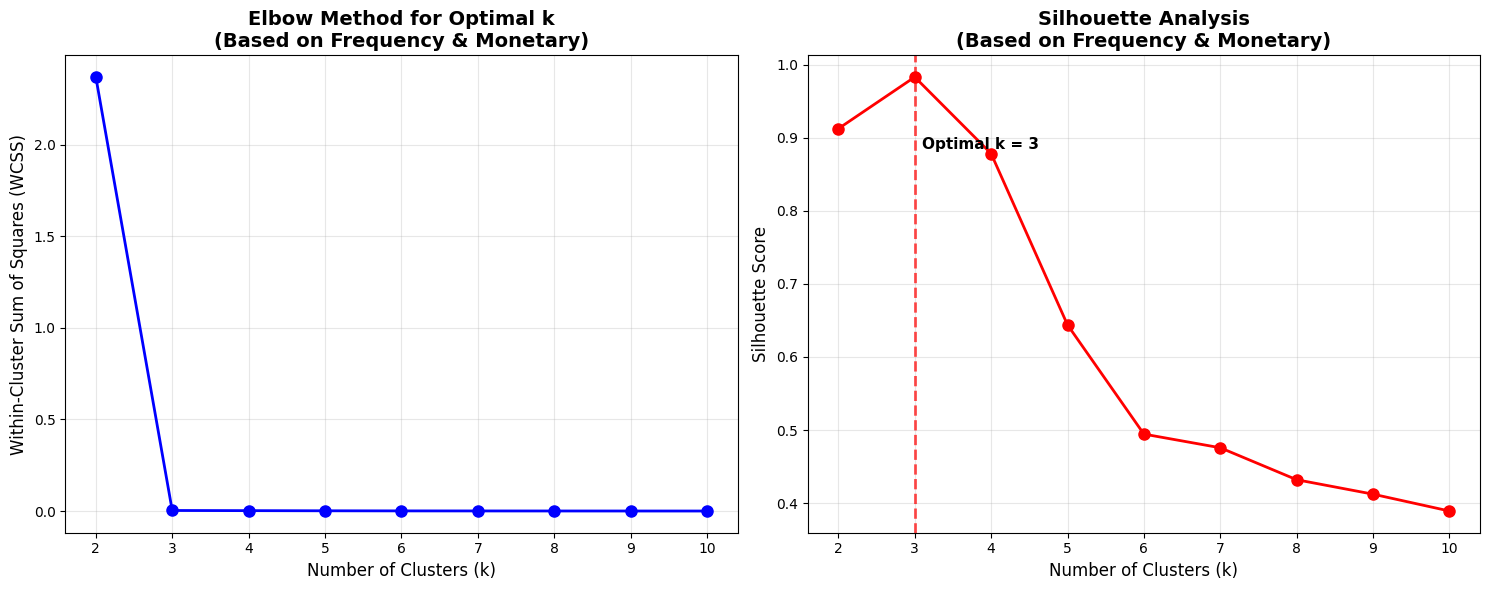


Optimal number of clusters: 3
Silhouette score for optimal k: 0.983


(3,
 [2.3686453421181093,
  0.0030923897857479425,
  0.0022346628366140733,
  0.001427479657036212,
  0.0008838613262122785,
  0.0005926798474529554,
  0.00040467634446406467,
  0.00027116186738463993,
  0.00016727153066427818],
 [0.9125362043201408,
  0.9832736340052005,
  0.8784497473294353,
  0.6439400742657898,
  0.4944131224664635,
  0.47568841806244955,
  0.43192128546388986,
  0.4121456351752116,
  0.3890803308799271])

In [38]:
# Step 2: Find optimal clusters (shows elbow + silhouette plots based on F&M only)
clustering.find_optimal_clusters()

In [39]:
# Step 3: Perform FM clustering (uses k=3 by default, clusters on F&M only)
clustering.perform_clustering(n_clusters=3)


Performing FM clustering with k=3
Clustering features: Frequency (transaction_id count) and Monetary (total_price sum)

Cluster centers (after scaling back):
         frequency    monetary
cluster                       
0          1534.42   347658.33
1         24549.67  5505883.33
2          6137.40  1384914.00

Cluster ranking by combined F+M score:
         frequency    monetary  combined_score
cluster                                       
1         24549.67  5505883.33            2.00
2          6137.40  1384914.00            0.50
0          1534.42   347658.33            0.13

FM Clustering completed successfully!
Number of clusters: 3

Cluster Characteristics:
• Cluster_1_High_Value:
  - Average Frequency: 24549.7 transactions
  - Average Monetary: $5,505,883
  - Customer Count: 3
  - Combined Score: 2.00
• Cluster_2_Medium_Value:
  - Average Frequency: 6137.4 transactions
  - Average Monetary: $1,384,914
  - Customer Count: 5
  - Combined Score: 0.50
• Cluster_3_Low_Value:
  - 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 0],
      dtype=int32)

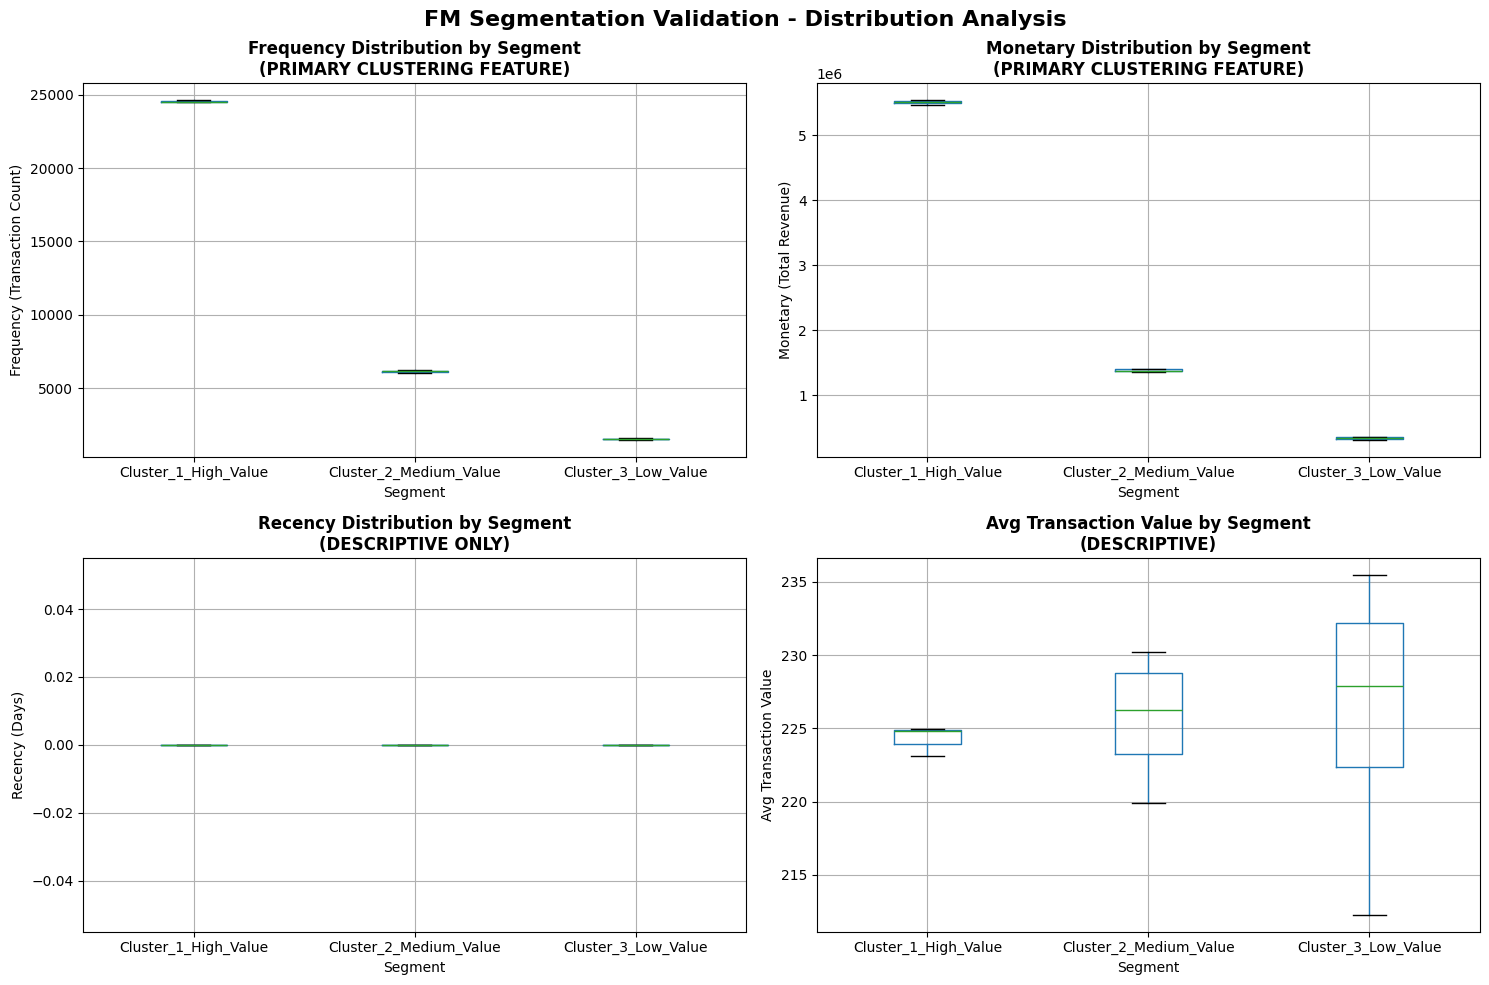


FM Segmentation Validation Statistics:
PRIMARY CLUSTERING FEATURES (Frequency & Monetary):
----------------------------------------

Cluster_1_High_Value (n=3):
  🎯 Frequency - Mean: 24549.7, Std: 74.7
  🎯 Monetary - Mean: $5505883, Std: $37272
  📊 Recency - Mean: 0.0 days, Std: 0.0
  📊 Avg Transaction Value: $224

Cluster_3_Low_Value (n=12):
  🎯 Frequency - Mean: 1534.4, Std: 32.6
  🎯 Monetary - Mean: $347658, Std: $15955
  📊 Recency - Mean: 0.0 days, Std: 0.0
  📊 Avg Transaction Value: $227

Cluster_2_Medium_Value (n=5):
  🎯 Frequency - Mean: 6137.4, Std: 85.0
  🎯 Monetary - Mean: $1384914, Std: $20586
  📊 Recency - Mean: 0.0 days, Std: 0.0
  📊 Avg Transaction Value: $226


In [40]:
# Step 4: Validate segmentation (boxplots to check F&M separation)
clustering.validate_segmentation()

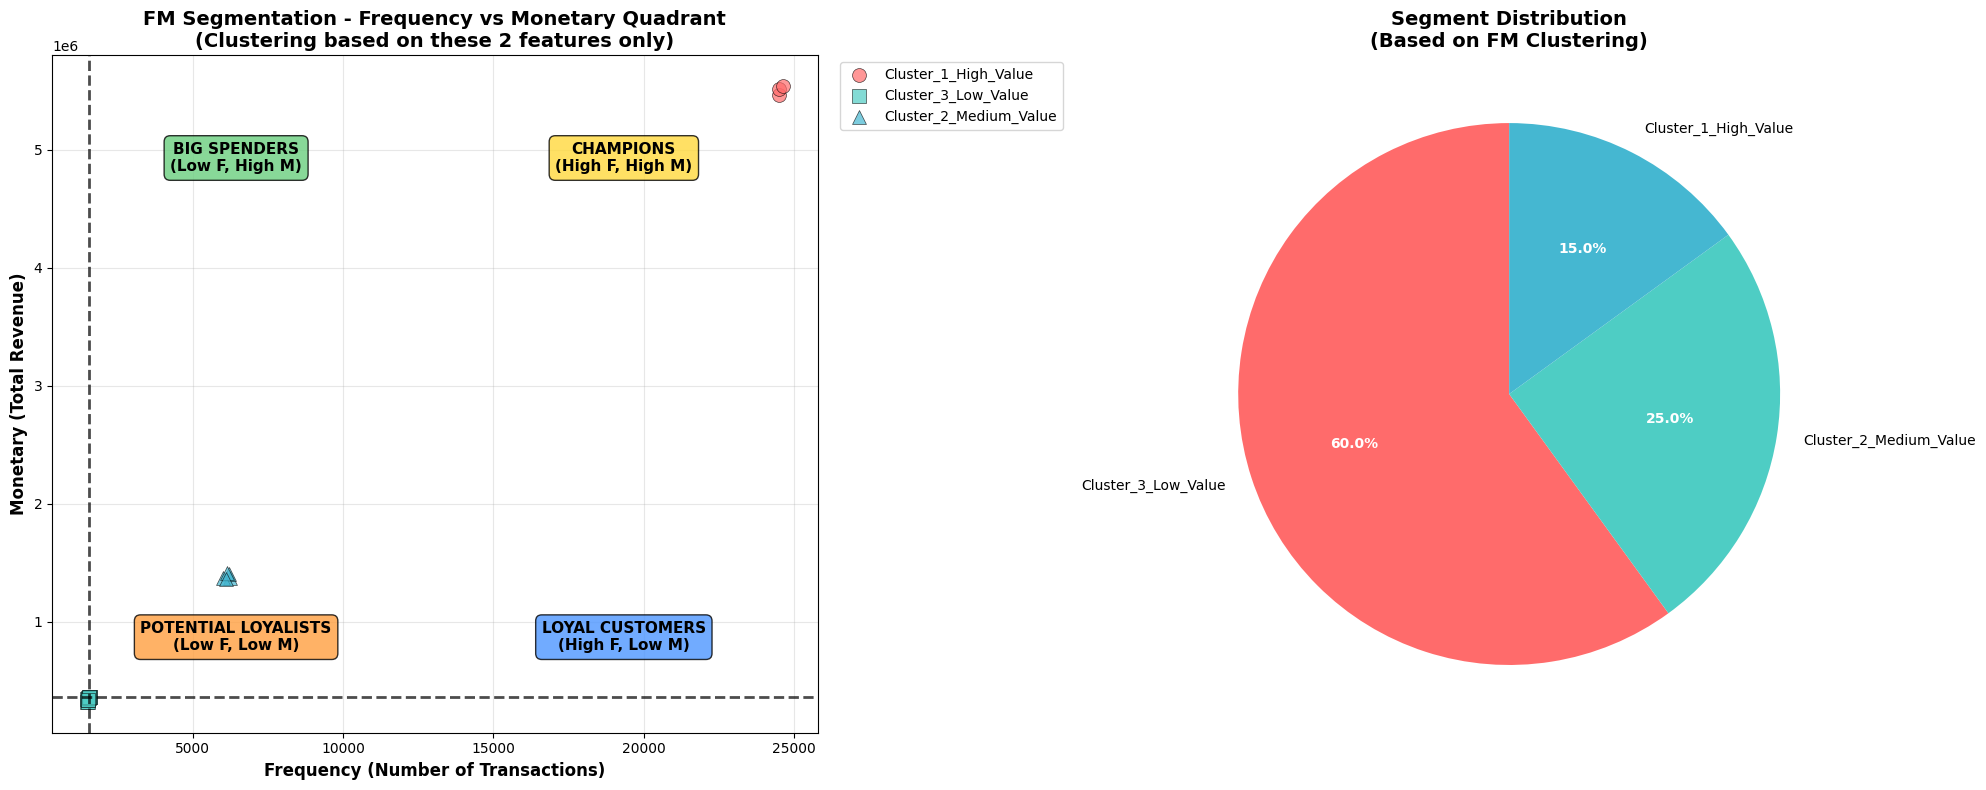


🎯 FM QUADRANT SUMMARY:
Frequency median threshold: 1566.0
Monetary median threshold: $363,810

📊 Cluster_3_Low_Value:
   Count: 12 customers (60.0%)
   Avg Frequency: 1534.4 transactions
   Avg Monetary: $347,658
   Quadrant: Low F + Low M

📊 Cluster_2_Medium_Value:
   Count: 5 customers (25.0%)
   Avg Frequency: 6137.4 transactions
   Avg Monetary: $1,384,914
   Quadrant: High F + High M

📊 Cluster_1_High_Value:
   Count: 3 customers (15.0%)
   Avg Frequency: 24549.7 transactions
   Avg Monetary: $5,505,883
   Quadrant: High F + High M


In [41]:
# Step 5: Create FM quadrant visualization (F vs M scatter plot)
clustering.create_fm_quadrant_visualization()

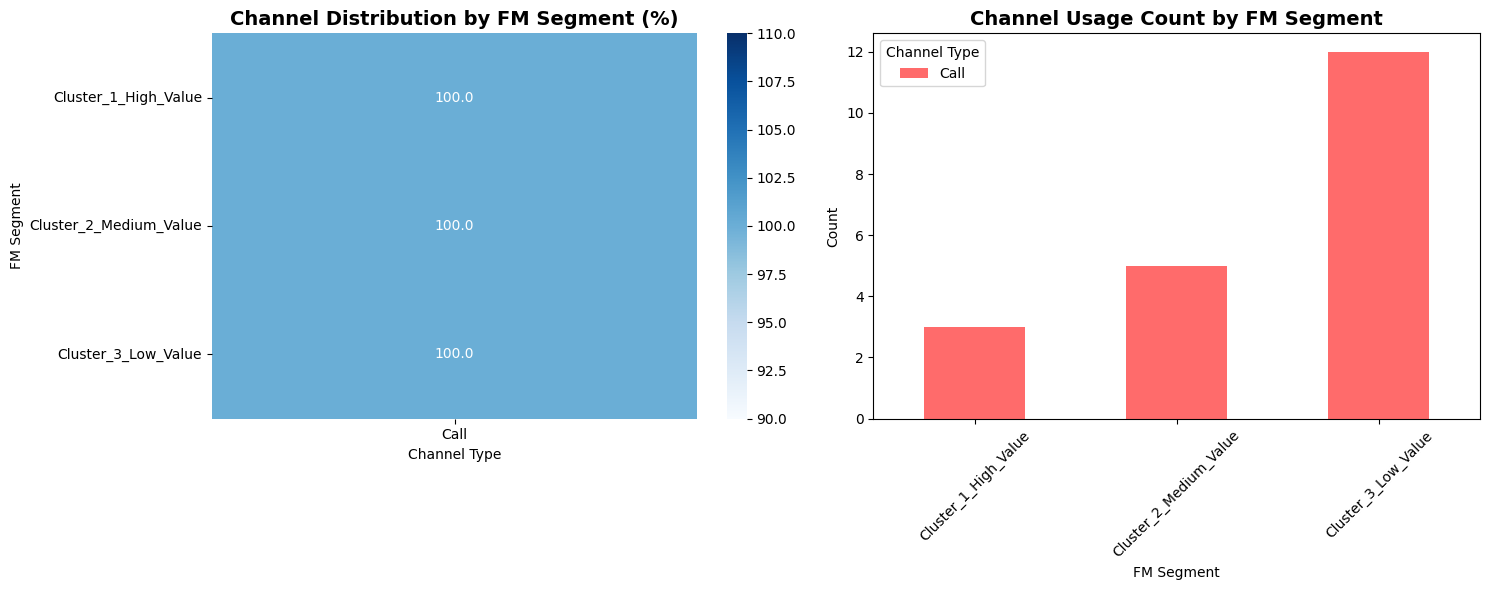

📊 CHANNEL DISTRIBUTION ANALYSIS BY FM SEGMENT:
channel_type             Call
segment_name                 
Cluster_1_High_Value    100.0
Cluster_2_Medium_Value  100.0
Cluster_3_Low_Value     100.0


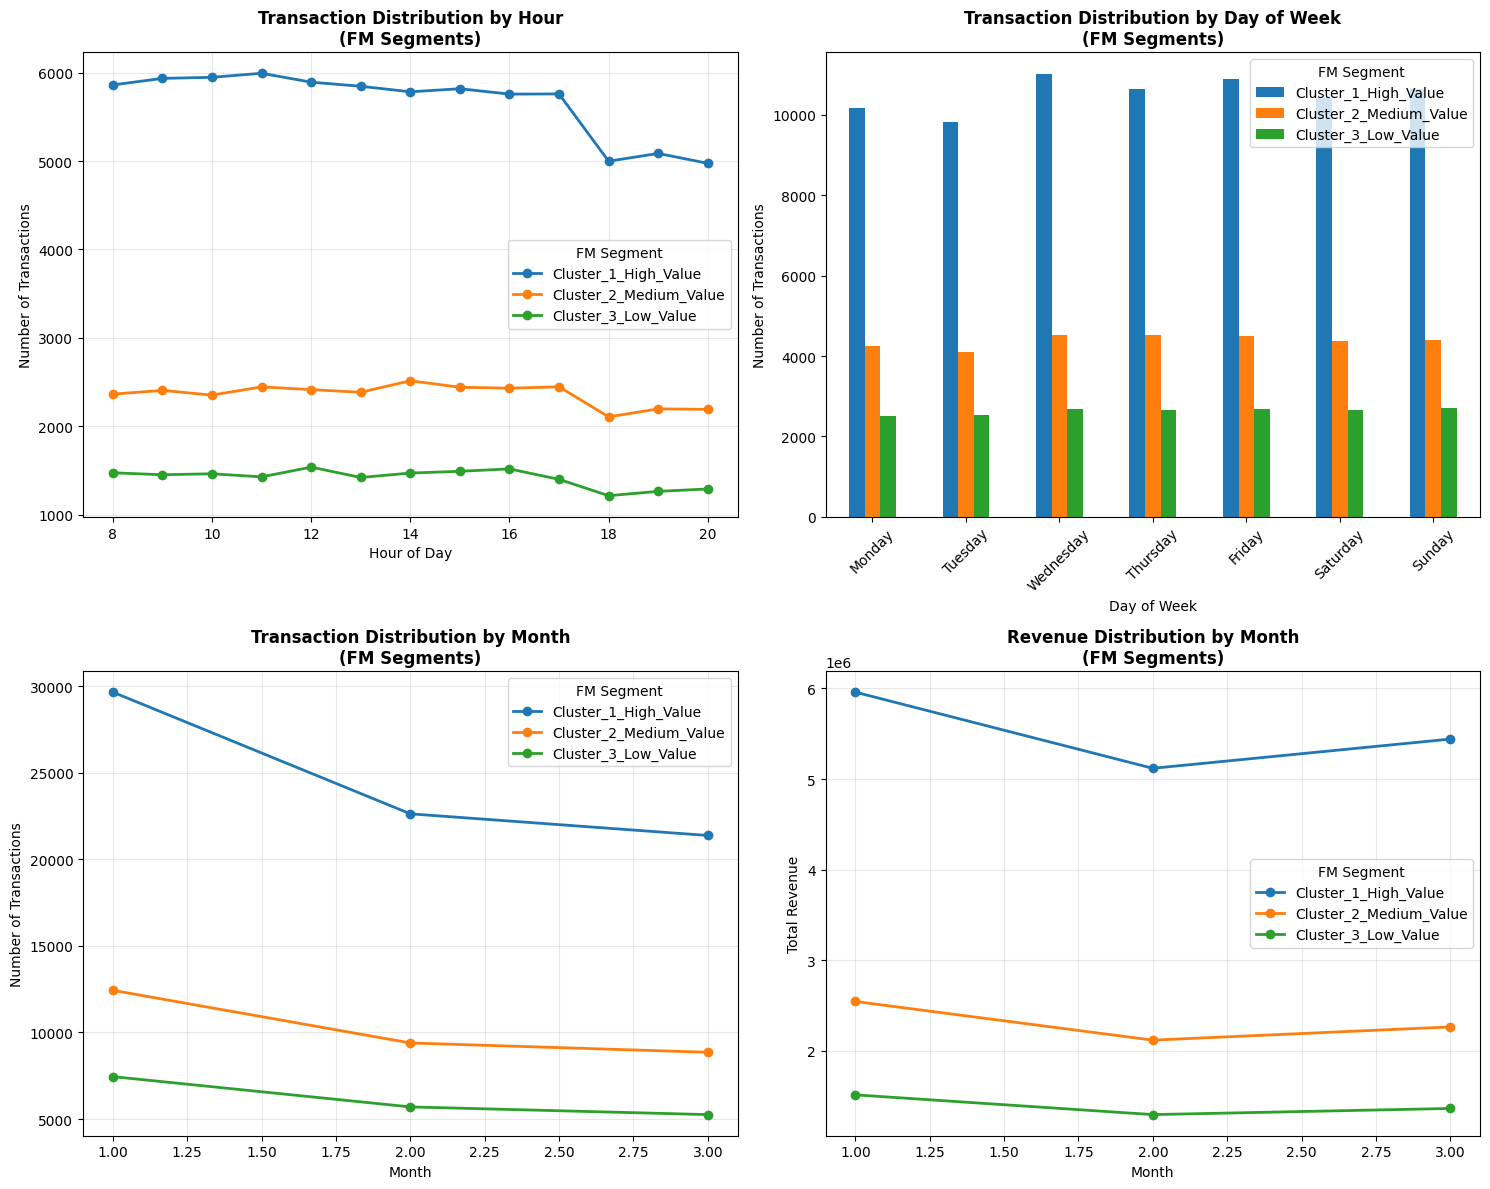

,transaction_id,user_id,total_price,charge,created_at,message_status,channel_type,message_type,receivedTimestamp,user_name,field_of_business,join_date,days_since_join,transaction_success,segment_name,hour,day_of_week,month
0,6875bd647ecd7c0012e62af9,user_20,540,True,2025-01-18 10:03:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,656,1,Cluster_3_Low_Value,10,Saturday,1
1,68746a8de3434a0019b2dd20,user_20,740,True,2025-01-30 09:59:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,668,1,Cluster_3_Low_Value,9,Thursday,1
2,686dcfe5e3434a0019b26884,user_20,520,True,2025-02-26 12:31:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,695,1,Cluster_3_Low_Value,12,Wednesday,2
3,6865cf52e3434a0019b2173b,user_20,520,True,2025-01-21 11:13:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,659,1,Cluster_3_Low_Value,11,Tuesday,1
4,686dce1de3434a0019b263c7,user_20,800,True,2025-01-10 13:02:00,answered,Call,voice,NaN,CV Hotel Jaya,Hospitality,2023-04-03,648,1,Cluster_3_Low_Value,13,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122744,683d3364f7e73600122944c5,user_11,150,True,2025-03-03 10:00:00,submitted,WhatsApp,service,NaN,PT Travel Nusantara,Hospitality,2024-05-22,285,0,Cluster_3_Low_Value,10,Monday,3
122745,683c772b9eb5180012164eea,user_11,150,True,2025-01-30 10:22:00,submitted,WhatsApp,service,NaN,PT Travel Nusantara,Hospitality,2024-05-22,253,0,Cluster_3_Low_Value,10,Thursday,1
122746,68445a309eb518001237a910,user_11,400,True,2025-02-26 20:59:00,submitted,WhatsApp,marketing,NaN,PT Travel Nusantara,Hospitality,2024-05-22,280,0,Cluster_3_Low_Value,20,Wednesday,2
122747,683e626f1e1cd700127b209f,user_11,400,True,2025-02-15 10:30:00,submitted,WhatsApp,marketing,NaN,PT Travel Nusantara,Hospitality,2024-05-22,269,0,Cluster_3_Low_Value,10,Saturday,2


In [42]:
# Step 6: Analyze channels and time patterns by FM segments
clustering.analyze_channel_distribution()
clustering.analyze_time_distribution()

In [43]:
# Step 7: Generate strategic recommendations based on FM profiles
clustering.generate_strategic_recommendations()


STRATEGIC RECOMMENDATIONS & IMPACT ANALYSIS
(Based on Frequency-Monetary Clustering)

📊 FM SEGMENT PERFORMANCE OVERVIEW:
------------------------------------------------------------
                        customer_count  total_revenue  \
segment_name                                            
Cluster_1_High_Value                 3       16517650   
Cluster_2_Medium_Value               5        6924570   
Cluster_3_Low_Value                 12        4171900   

                        avg_revenue_per_customer  avg_frequency  avg_recency  \
segment_name                                                                   
Cluster_1_High_Value                  5505883.33       24549.67          0.0   
Cluster_2_Medium_Value                1384914.00        6137.40          0.0   
Cluster_3_Low_Value                    347658.33        1534.42          0.0   

                        avg_transaction_value  revenue_percentage  
segment_name                                                  

,customer_count,total_revenue,avg_revenue_per_customer,avg_frequency,avg_recency,avg_transaction_value,revenue_percentage
segment_name,,,,,,,
Cluster_1_High_Value,3,16517650,5505883.33,24549.67,0.0,224.27,59.8
Cluster_2_Medium_Value,5,6924570,1384914.00,6137.40,0.0,225.68,25.1
Cluster_3_Low_Value,12,4171900,347658.33,1534.42,0.0,226.51,15.1


In [44]:
# Step 8: Save results
clustering.save_results()


✅ FM clustering results saved to: fm_segmentation_results.csv
✅ Detailed transaction-level results saved to: fm_segmentation_results_detailed.csv
✅ Segment summary saved to: fm_segmentation_results_summary.csv

📊 FILES CREATED:
1. fm_segmentation_results.csv - Customer-level FM segments
2. fm_segmentation_results_detailed.csv - Transaction-level data with segments
3. fm_segmentation_results_summary.csv - Segment statistical summary


('fm_segmentation_results.csv', 'fm_segmentation_results_detailed.csv')